In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Economic_Index.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# Remove unnecessary columns
df_index = df.drop(columns=["Unnamed: 0","year","month"])

In [6]:
# Check for null Values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

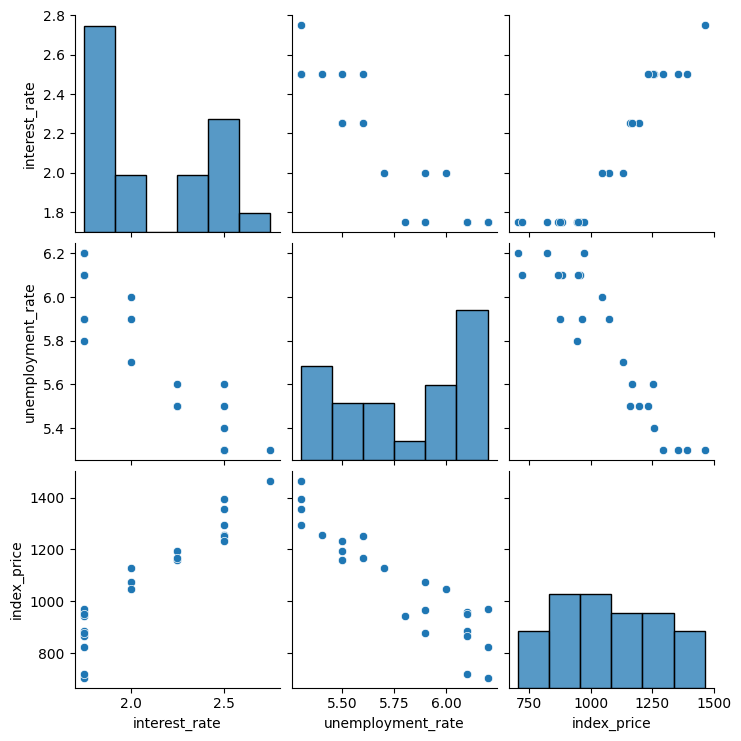

In [7]:
# Visualisation
sns.pairplot(df_index)

In [8]:
# Correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

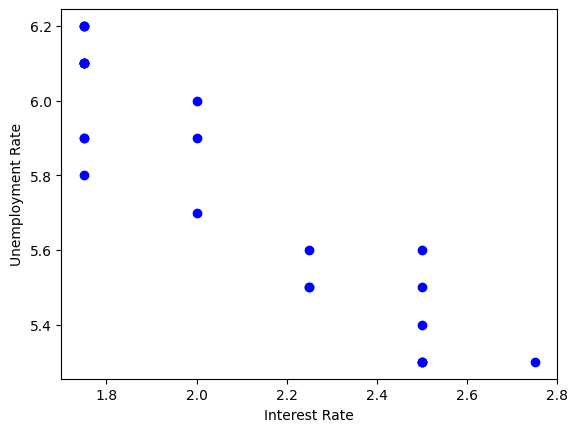

In [9]:
# Visualise data more closely
plt.scatter(x=df_index['interest_rate'],y=df_index['unemployment_rate'],color='b')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [10]:
# Independent and Dependent features
X = df_index.iloc[:,:-1]
Y = df_index.iloc[:,-1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
Y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

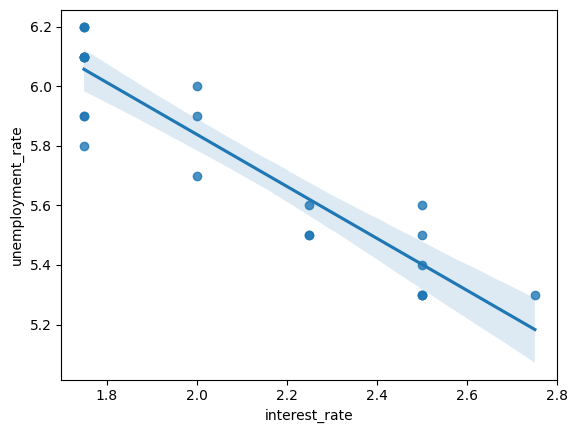

In [14]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

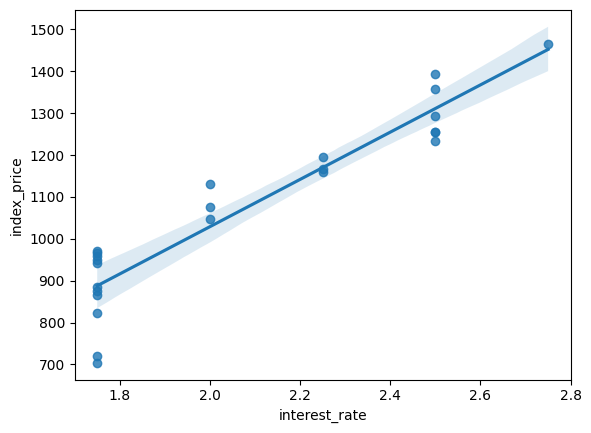

In [15]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

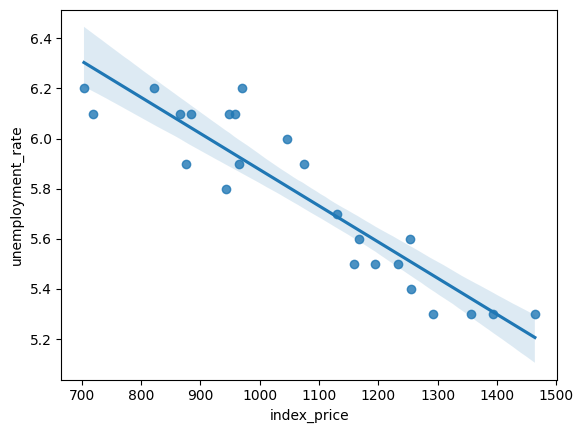

In [16]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)

In [19]:
x_test = scaler.fit_transform(x_test)

In [20]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [22]:
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
# Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error',cv=3)

In [29]:
print(np.mean(validation_score)) # Mean of Validation Score

-5914.828180162386


In [31]:
# Predictions
y_pred = regression.predict(x_test)

In [33]:
print(y_pred)

[1180.7466813   802.74279699 1379.83457045  838.52599602  973.85313963
 1144.96348227]


In [34]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [35]:
# R Square
from sklearn.metrics import r2_score
r_square_score = r2_score(y_test, y_pred)
print("R Square :",r_square_score)

R Square : 0.7591371539010257


In [36]:
# Adjusted R Square
#
Adj_r2 = 1-((1-r_square_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjust R Square :", Adj_r2)

Adjust R Square : 0.5985619231683761


In [45]:
# Coefficient
print(regression.coef_)

[  88.27275507 -116.25716066]


### Assumptions

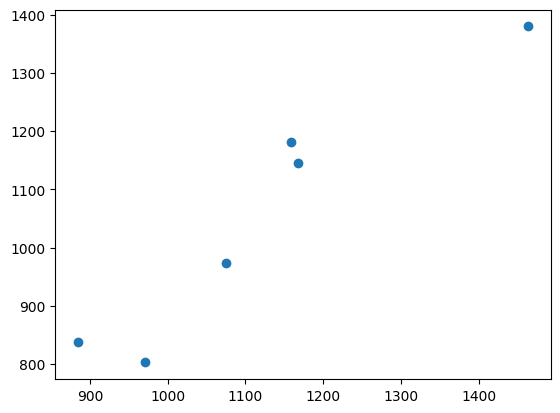

In [37]:
plt.scatter(y_test,y_pred)
# to check if there is a linear realation between the points

In [38]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


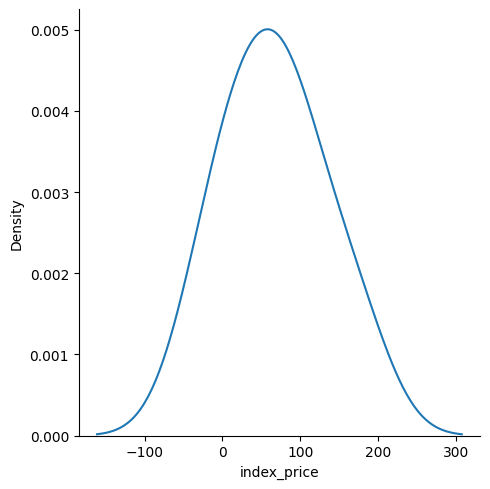

In [39]:
## Plot these residuals
sns.displot(residuals,kind='kde')
# We get a normal distribution

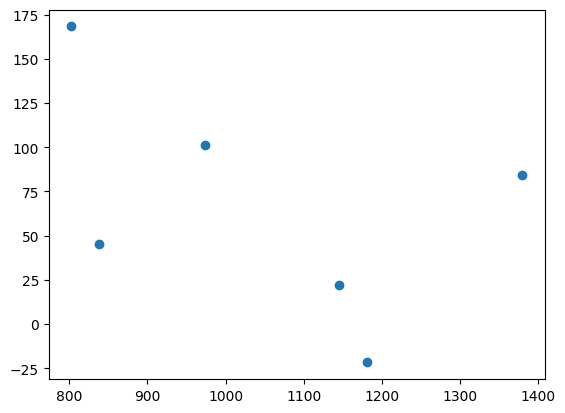

In [40]:
## Scatter plot w.r.t to prediction and residuals
plt.scatter(y_pred,residuals)
# The data is uniformally distributed

In [42]:
# OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [43]:
model.summary()

/home/mylo/Projects/Regression/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 27 Jan 2025   Prob (F-statistic):                       0.754
Time:                        22:57:02   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""